### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import train_test_split

import statsmodels.api as sm

%matplotlib inline

In [2]:
df = pd.read_excel('Madhya Pradesh.xlsx')

In [3]:
df.head()

,Year,Population,Male,Female
0,1901,12679214,6429374,6249840
1,1911,14249382,7245404,7003978
2,1921,13906774,7133621,6773153
3,1931,15326879,7871541,7455338
4,1941,17175722,8825634,8350088


#### Normalizing the Data

In [4]:
scaler = MinMaxScaler()
df[['Population']] = scaler.fit_transform(df[['Population']])

In [5]:
df1 = df[['Year','Population']]

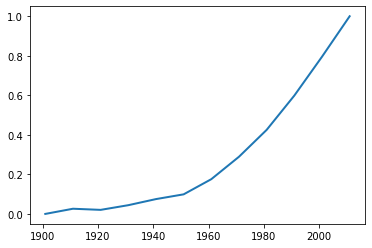

In [6]:
plt.plot(df1['Year'],df1['Population'],linewidth=2.0)

## Prediction on Population

In [7]:
#train-test set creation
X = df1['Year'].values.reshape(-1,1)
y = df1['Population'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
  
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X_train) 
X_test = poly.fit_transform(X_test)
  
poly.fit(X_poly, y_train) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y_train)
lin2.score(X_test,y_test)

0.9902330855215474

In [8]:
#training on the whole dataset
X = df1['Year'].values.reshape(-1,1)
y = df1['Population'].values.reshape(-1,1)
from sklearn.preprocessing import PolynomialFeatures 
  
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X) 
  
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y) 


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
dfTest = pd.DataFrame({'Year':[2021,2031,2041,2051]})

In [10]:
pred = []
for i in dfTest['Year']:
    pred.append(lin2.predict(poly.fit_transform([[i]]))[0][0])

In [11]:
pred

[1.2970477368630782,
 1.6243599529107087,
 2.0024553043303968,
 2.4351306034527624]

In [12]:
dfTest['Population'] = pred


In [13]:
df1 = df1.append(dfTest,ignore_index=True)
df1.tail(5)

,Year,Population
11,2011,1.000000
12,2021,1.297048
13,2031,1.624360
14,2041,2.002455
15,2051,2.435131


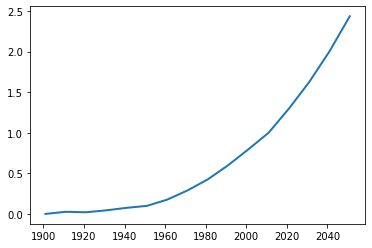

In [14]:
plt.plot(df1['Year'],df1['Population'],linewidth=2.0)


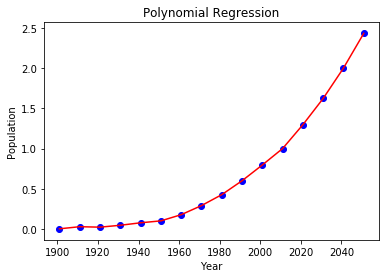

In [15]:
# Visualising the Polynomial Regression results
plt.scatter(df1['Year'], df1['Population'], color = 'blue') 
  
plt.plot(df1['Year'], df1['Population'], color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Year') 
plt.ylabel('Population') 
  
plt.show()

### WRT Unproportioned Scale

In [16]:
pred = []
for i in df1['Population']:
    pred.append(round(scaler.inverse_transform([[i]])[0][0]))

In [17]:
pred

[12679214.0,
 14249382.0,
 13906774.0,
 15326879.0,
 17175722.0,
 18614931.0,
 23217910.0,
 30016625.0,
 38168507.0,
 48566242.0,
 60348023.0,
 72626809.0,
 90434106.0,
 110055687.0,
 132721594.0,
 158659437.0]

In [18]:
df1['Population'] = pred


In [19]:
df1

,Year,Population
0,1901,12679214.0
1,1911,14249382.0
2,1921,13906774.0
3,1931,15326879.0
4,1941,17175722.0
5,1951,18614931.0
6,1961,23217910.0
7,1971,30016625.0
8,1981,38168507.0
9,1991,48566242.0


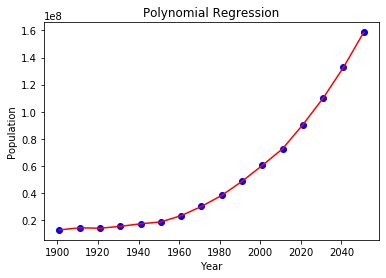

In [20]:
# Visualising the Polynomial Regression results 
plt.scatter(df1['Year'], df1['Population'], color = 'blue') 
  
plt.plot(df1['Year'], df1['Population'], color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Year') 
plt.ylabel('Population') 
  
plt.show() 

### Male Population

In [21]:
scaler = MinMaxScaler()
df[['Male']] = scaler.fit_transform(df[['Male']])

In [22]:
df2 = df[['Year','Male']]
df2

,Year,Male
0,1901,0.000000
1,1911,0.026169
2,1921,0.022584
3,1931,0.046249
4,1941,0.076845
5,1951,0.100771
6,1961,0.179288
7,1971,0.295061
8,1981,0.430916
9,1991,0.608195


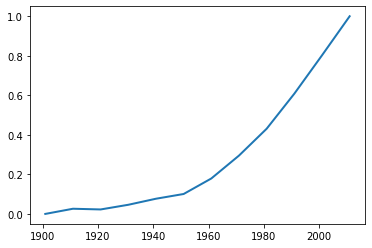

In [23]:
plt.plot(df2['Year'],df2['Male'],linewidth=2.0)


In [24]:
#train-test set creation
X = df1['Year'].values.reshape(-1,1)
y = df1['Population'].values.reshape(-1,1)
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
  
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X_train) 
X_test = poly.fit_transform(X_test)
  
poly.fit(X_poly, y_train) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y_train)
lin2.score(X_test,y_test)

0.9994934086636296

In [25]:
#training on the whole dataset
X = df2['Year'].values.reshape(-1,1)
y = df2['Male'].values.reshape(-1,1)
from sklearn.preprocessing import PolynomialFeatures 
  
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X) 
  
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
dfTest = pd.DataFrame({'Year':[2021,2031,2041,2051]})

In [27]:
pred = []
for i in dfTest['Year']:
    pred.append(lin2.predict(poly.fit_transform([[i]]))[0][0])

In [28]:
pred

[1.2945171990229483,
 1.6150539898301304,
 1.9839858363473013,
 2.4047951298614407]

In [29]:
dfTest['Male'] = pred

In [30]:
df2 = df2.append(dfTest,ignore_index=True)
df2

,Year,Male
0,1901,0.000000
1,1911,0.026169
2,1921,0.022584
3,1931,0.046249
4,1941,0.076845
5,1951,0.100771
6,1961,0.179288
7,1971,0.295061
8,1981,0.430916
9,1991,0.608195


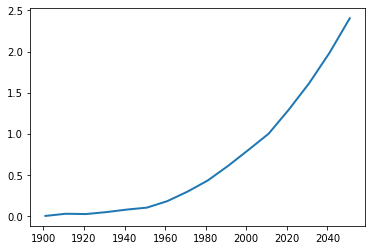

In [31]:
plt.plot(df2['Year'],df2['Male'],linewidth=2.0)

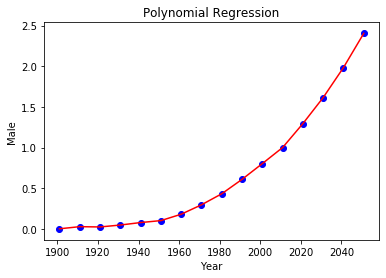

In [32]:
plt.scatter(df2['Year'], df2['Male'], color = 'blue') 
  
plt.plot(df2['Year'], df2['Male'], color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Year') 
plt.ylabel('Male') 
  
plt.show()

#### WRT UNSCALED MALE

In [33]:
pred = []
for i in df2['Male']:
    pred.append(round(scaler.inverse_transform([[i]])[0][0]))

In [34]:
pred

[6429374.0,
 7245404.0,
 7133621.0,
 7871541.0,
 8825634.0,
 9571722.0,
 12020106.0,
 15630250.0,
 19866607.0,
 25394673.0,
 31443652.0,
 37612306.0,
 46796216.0,
 56791493.0,
 68295869.0,
 81417937.0]

In [35]:
df2['Male'] = pred
df2

,Year,Male
0,1901,6429374.0
1,1911,7245404.0
2,1921,7133621.0
3,1931,7871541.0
4,1941,8825634.0
5,1951,9571722.0
6,1961,12020106.0
7,1971,15630250.0
8,1981,19866607.0
9,1991,25394673.0


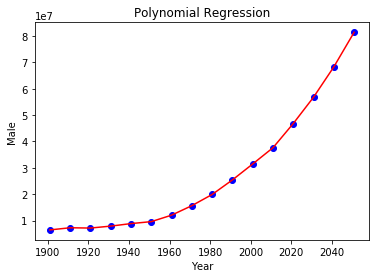

In [36]:
# Visualising the Polynomial Regression results 
plt.scatter(df2['Year'], df2['Male'], color = 'blue') 
  
plt.plot(df2['Year'], df2['Male'], color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Year') 
plt.ylabel('Male') 
  
plt.show()

### Female Population

In [37]:
scaler = MinMaxScaler()
df[['Female']] = scaler.fit_transform(df[['Female']])

In [38]:
df3 = df[['Year','Female']]
df3.head()

,Year,Female
0,1901,0.000000
1,1911,0.026218
2,1921,0.018193
3,1931,0.041909
4,1941,0.073015


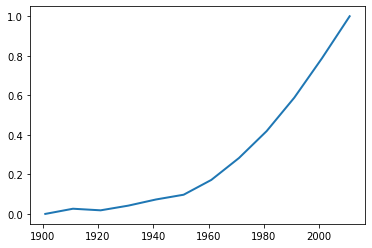

In [39]:
plt.plot(df3['Year'],df3['Female'],linewidth=2.0)

In [40]:
#train-test set creation
X = df3['Year'].values.reshape(-1,1)
y = df3['Female'].values.reshape(-1,1)
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
  
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X_train) 
X_test = poly.fit_transform(X_test)
  
poly.fit(X_poly, y_train) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y_train)
lin2.score(X_test,y_test)

0.9960143960802569

In [41]:
#train on whole dataset
X = df3['Year'].values.reshape(-1,1)
y = df3['Female'].values.reshape(-1,1)
from sklearn.preprocessing import PolynomialFeatures 
  
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X) 
  
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
dfTest = pd.DataFrame({'Year':[2021,2031,2041,2051]})

In [43]:
pred = []
for i in dfTest['Year']:
    pred.append(lin2.predict(poly.fit_transform([[i]]))[0][0])

In [44]:
pred

[1.2997910187098114, 1.6344482755350782, 2.0224775152203165, 2.468016404783839]

In [45]:
dfTest['Female'] = pred

In [46]:
df3 = df3.append(dfTest,ignore_index=True)
df3.tail(5)

,Year,Female
11,2011,1.000000
12,2021,1.299791
13,2031,1.634448
14,2041,2.022478
15,2051,2.468016


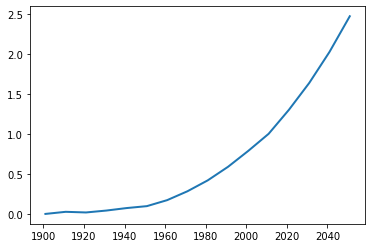

In [47]:
plt.plot(df3['Year'],df3['Female'],linewidth=2.0)

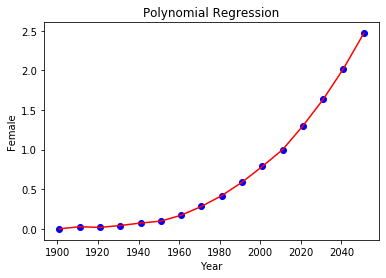

In [48]:
# Visualising the Polynomial Regression results 
plt.scatter(df3['Year'], df3['Female'], color = 'blue') 
  
plt.plot(df3['Year'], df3['Female'], color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Year') 
plt.ylabel('Female') 
  
plt.show() 

# WRT Unscaled Population

In [49]:
pred = []
for i in df3['Female']:
    pred.append(round(scaler.inverse_transform([[i]])[0][0]))

In [50]:
pred

[6249840.0,
 7003978.0,
 6773153.0,
 7455338.0,
 8350088.0,
 9043209.0,
 11197804.0,
 14386375.0,
 18301900.0,
 23171569.0,
 28904371.0,
 35014503.0,
 43637891.0,
 53264194.0,
 64425724.0,
 77241500.0]

In [51]:
df3['Female'] = pred

In [52]:
df3

,Year,Female
0,1901,6249840.0
1,1911,7003978.0
2,1921,6773153.0
3,1931,7455338.0
4,1941,8350088.0
5,1951,9043209.0
6,1961,11197804.0
7,1971,14386375.0
8,1981,18301900.0
9,1991,23171569.0


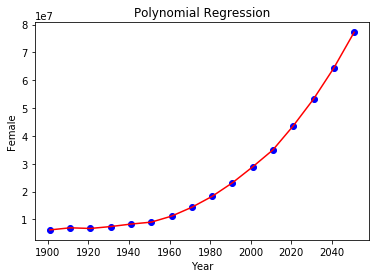

In [53]:
# Visualising the Polynomial Regression results 
plt.scatter(df3['Year'], df3['Female'], color = 'blue') 
  
plt.plot(df3['Year'], df3['Female'], color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Year') 
plt.ylabel('Female') 
  
plt.show() 

In [54]:
df4 = pd.concat([df1,df2,df3], axis =1)

In [55]:
df4

,Year,Population,Year,Male,Year,Female
0,1901,12679214.0,1901,6429374.0,1901,6249840.0
1,1911,14249382.0,1911,7245404.0,1911,7003978.0
2,1921,13906774.0,1921,7133621.0,1921,6773153.0
3,1931,15326879.0,1931,7871541.0,1931,7455338.0
4,1941,17175722.0,1941,8825634.0,1941,8350088.0
5,1951,18614931.0,1951,9571722.0,1951,9043209.0
6,1961,23217910.0,1961,12020106.0,1961,11197804.0
7,1971,30016625.0,1971,15630250.0,1971,14386375.0
8,1981,38168507.0,1981,19866607.0,1981,18301900.0
9,1991,48566242.0,1991,25394673.0,1991,23171569.0
